<a href="https://colab.research.google.com/github/repoocsov/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












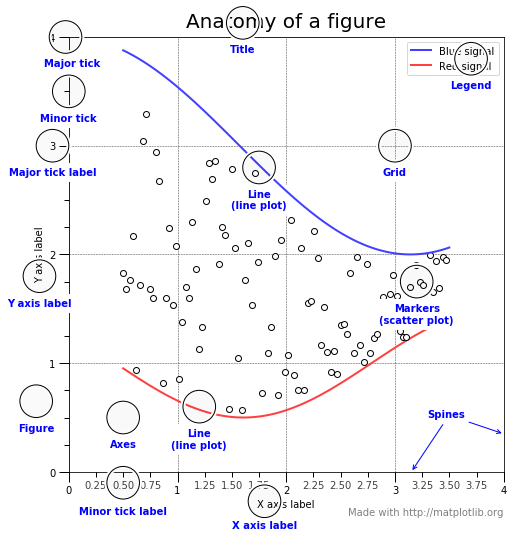

In [2]:
"""---------------------------------------------------
--------------REPLICATING LESSON CODE-----------------
---------------------------------------------------"""
# Figure > Axes/Subplot > YAaxis/XAxis
# Outer edge of figure are called spines

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

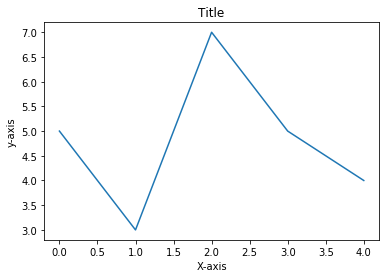

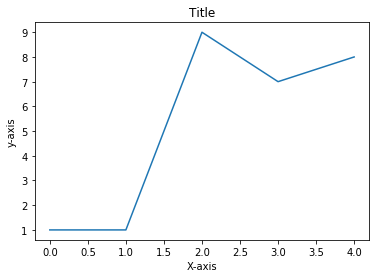

In [3]:
import matplotlib.pyplot as plt

# 2 dummy data sets
data = [5,3,7,5,4]
data2 = [1,1,9,7,8]

# The following shows pyplots methods which are more of a quick and dirty method
plt.plot(data)
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title('Title')
plt.show()

plt.plot(data2)
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title('Title')
plt.show()

In [4]:
# EXAMPLE TO REPRODUCE
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

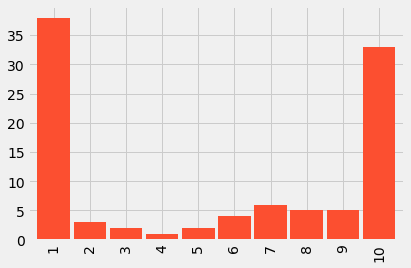

In [5]:
# Ryan's dummy data close to real chart
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=.9);

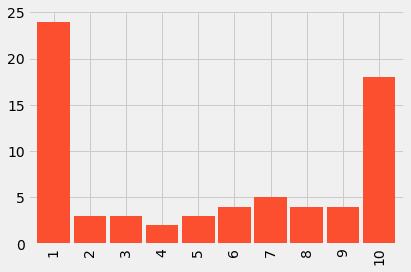

In [6]:
# Alternatively
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

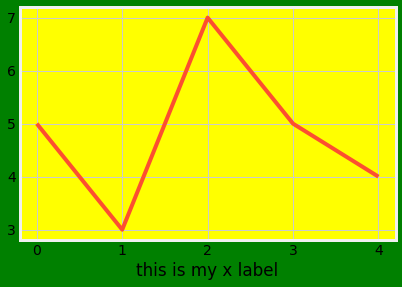

In [7]:
# Figure/Axes syntax, which we will be working with...
fig, ax = plt.subplots()

fig.patch.set(facecolor='green')

ax.set(facecolor="yellow")
ax.set_xlabel("this is my x label")
ax.plot(data, color='C1');

In [8]:
display(example)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


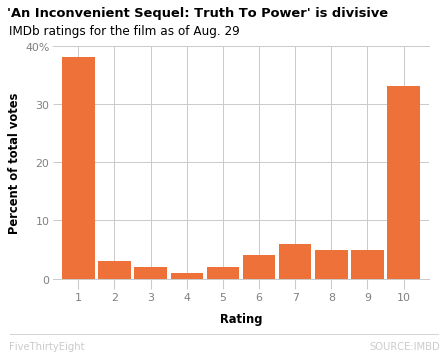

In [9]:
#Set Stylesheet
plt.style.use('fivethirtyeight')

# figure / axes syntax
fig, ax = plt.subplots()

# plot the bars
fake.plot.bar(fake, width=0.9, color='#ED7139')


# x axis tick labels
ax.set_xticklabels(labels=range(1,11,1), color='gray', rotation='horizontal', fontsize='11')

# y axis tick labels
ax.set_yticklabels(labels=["0", "10", "20", "30", "40%"], color='gray', fontsize='11')

# set y ticks
ax.set_yticks(ticks=range(0,50,10))

# set figure background color
fig.set_facecolor(color="white")
# fig.patch.set(facecolor='white')

# Set the axes background color
# ax.set(facecolor='white')
ax.set_facecolor(color='white')


# ADDITIONAL CHANGES I'M MAKING
#------------------------------

# Fixing ticks
ax.tick_params(axis='x',  width=1.1, which='major', length=10, color="#CBCBCB", top=False, bottom=True, labeltop=False)
#ax.tick_params(axis='x',  width=1.1, which='major', length=2, color="#CBCBCB", top=True, bottom=False, labeltop=False)
# Interested if anyone finds a solution to only adjust tick length of the top or bottom.
# The above code gets overwritten...
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Removing left and right spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Fixing spine color
ax.spines['top'].set_color("#CBCBCB")
ax.spines['bottom'].set_color("#CBCBCB")

# Fixing spine thickness
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Chaning the grid color/width
ax.grid(color='#CBCBCB', linestyle='-', linewidth=1)


# Moving the title more left
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             loc='left', 
             color="black", 
             fontsize=13, 
             fontweight='bold', 
             x=-.122, 
             y=1.1)
ax.text(s='IMDb ratings for the film as of Aug. 29', 
        x=-1.92, 
        y=42, 
        color='black', 
        fontsize=12)

# Labels
ax.set_ylabel('Percent of total votes', color='Black', fontsize=11.5, fontweight='bold')
ax.set_xlabel('Rating', labelpad=10, color='Black', fontsize=11.5, fontweight='bold')

# Adding bottom gray line
ax.text(s='______________________________________________________________________________________', 
        x=-1.92, 
        y=-9, 
        color='#CBCBCB', 
        fontsize=10)

# Adding source and FiveThirtyEight
ax.text(s='FiveThirtyEight', 
        x=-1.92, 
        y=-12, 
        color='#CBCBCB', 
        fontsize=10)
ax.text(s='SOURCE:IMBD', 
        fontfamily='Helvetica',
        x=8.06, 
        y=-12, 
        color='#CBCBCB', 
        fontsize=10)

plt.show()

# Pretty jank work around with the underscores above. At first I was working with figure parameter. Couldn't find a way to only have the bottom showing.

In [10]:
"""--------------------------------------------
------------REPRODUCING ANOTHER CHART----------
--------------------------------------------"""
#https://fivethirtyeight.com/wp-content/uploads/2018/06/Asher-Espionage-0618-11.png?w=575
url = 'https://fivethirtyeight.com/wp-content/uploads/2018/06/Asher-Espionage-0618-11.png'
example = Image(url=url, width=400)

display(example)

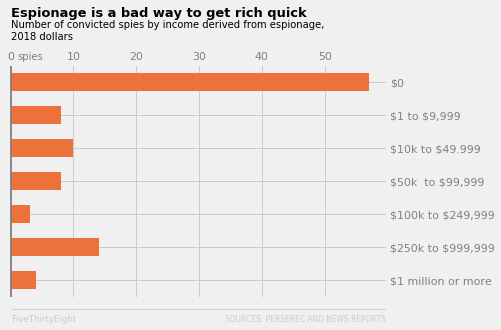

In [32]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

# Mimicing the data and plotting
spies = pd.Series([4,14,3,8,10,8,57],
                 index=range(1,8))
spies.plot.barh(spies, width=0.56, color='#ED713A')

#Setting title and subtitle
ax.set_title("Espionage is a bad way to get rich quick", 
             loc='left', 
             color="black", 
             fontsize=13, 
             fontweight='bold', 
             x=0, 
             y=1.18)
ax.text(s='Number of convicted spies by income derived from espionage,\n2018 dollars', 
        x=0, 
        y=7.29, 
        color='black', 
        fontsize=10)

# Adding 'spies'
ax.text(s='spies', 
        x=1, 
        y=6.69, 
        color='gray', 
        fontsize=10)

# Setting Y/X axes
dollar_ranges = ['$1 million or more', '\$250k to $999,999', '\$100k to $249,999', '\$50k  to \$99,999', '\$10k to $49.999', '\$1 to $9,999', '$0']


# x axis tick labels
ax.set_xticklabels(labels=range(0,51,10), color='gray', rotation='horizontal', fontsize='11')
ax.xaxis.tick_top()

# y axis tick labels
ax.set_yticklabels(labels=dollar_ranges, color='gray', fontsize='11')
ax.yaxis.tick_right()

# Setting the spines
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color("gray")
ax.spines['left'].set_linewidth(1.8)

# Adding bottom gray line
ax.text(s='___________________________________________________________________________', 
        x=0, 
        y=-.8, 
        color='#CBCBCB', 
        fontsize=10)

# Adding source and FiveThirtyEight
ax.text(s='FiveThirtyEight', 
        x=0, 
        y=-1.23, 
        color='#CBCBCB', 
        fontsize=8.6)
ax.text(s='SOURCES: PERSEREC AND NEWS REPORTS', 
        x=34.06, 
        y=-1.23, 
        color='#CBCBCB', 
        fontsize=7.5)


# Displaying
plt.show()

### Can't quite get the y_tick_labels positioned correctly.
### Posted this problem on stack overflow...waiting for a response and will revisit.
### Doubtful that there is a quick solution as this feels very customization specific

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here